<img src="Auswahl_2016-01-11_002.png">

<pre style="text-align: right">
Gruppe:             
                MeSi
Autoren:            
Jens Meiners
Arne Siebenmorgen
</pre>

<img src="Auswahl_2016-01-11_003.png">

<img src="Auswahl_2016-01-11_013.png">

From this note, we see that in the primal, we need to minimize $w$. In the dual, maximization of $\lambda_\alpha$ is needed. We get this parameter by building the Langrangian of the primal.

$$L = \frac{1}{2} |w|^2 + \frac{C}{p} \sum_{\alpha=1}^{p} \varphi_\alpha - \sum_{\alpha=1}^{p}\lambda_\alpha \{y_{\top}^{(\alpha)}f_\alpha-1+\varphi_\alpha\} - \sum_{\alpha=1}^{p} \mu_\alpha \varphi_\alpha$$

with $f = w^\top x^{(\alpha)} + b$

Minimization w.r.t. $w$<br>
$$\frac{\partial L}{\partial w_l} = w - \lambda_\alpha y_{\top}^{(\alpha)}x^{(\alpha)} \stackrel{!}{=} 0$$
$$w = \lambda_\alpha y_{\top}^{(\alpha)}x^{(\alpha)}$$

Minimization w.r.t. $b$ yields the first constraint<br>
$$\frac{\partial L}{\partial b} =- \sum_{\alpha=1}^{p}\lambda_\alpha y_{\top}^{(\alpha)}\stackrel{!}{=} 0$$

Minimization w.r.t. $\varphi$ yields the second constraint<br>
$$\frac{\partial L}{\partial \varphi_\alpha} = \frac{C}{p} - \lambda_\alpha - \mu_\alpha \stackrel{!}{=} 0$$
$$\Rightarrow 0 \leq \lambda_\alpha \leq \frac{C}{p}$$

Plugging the results back into the Lagrangian results in

$$-\frac{1}{2}\sum_{\alpha=1}^{p}\sum_{\beta=1}^{p} \lambda_\alpha\lambda_\beta y_{\top}^{(\alpha)}y_{\top}^{(\beta)}(x^{(\alpha)})^\top x^{(\beta)}\ +  \sum_{\alpha=1}^{p}\lambda_\alpha + \frac{C}{p} \sum_{\alpha=1}^{p} \varphi_\alpha - \sum_{\alpha=1}^{p} \mu_\alpha \varphi_\alpha$$

Its optimal solution depends on $\lambda$ because we solved the dual problem. The Problem therfore reduces to:

$$\max_{\lambda_\alpha} \{-\frac{1}{2}\sum_{\alpha=1}^{p}\sum_{\beta=1}^{p} \lambda_\alpha\lambda_\beta y_{\top}^{(\alpha)}y_{\top}^{(\beta)}(x^{(\alpha)})^\top x^{(\beta)}\ +  \sum_{\alpha=1}^{p}\lambda_\alpha\}$$

Which is the result we searched for.

<img src="Auswahl_2016-01-11_004.png">

<img src="Auswahl_2016-01-11_005.png">

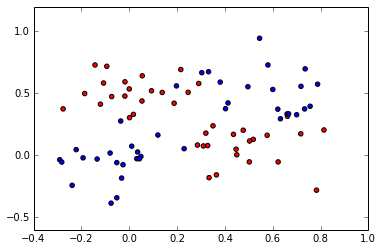

In [30]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors
%matplotlib inline
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'blue': [(0, 0.7, 0.7), (1, 1, 1)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'red': [(0, 1, 1), (1, 0.7, 0.7)]})
plt.cm.register_cmap(cmap=cmap)

# generate training data
cov = [[0.1, 0], [0, 0.1]]

mean1 = [0. , 1.]
mean2 = [1. , 0.]
mean3 = [0. , 0.]
mean4 = [1. , 1.]

p1 = 0.5*(np.vstack((np.random.multivariate_normal(mean1, cov, 20), np.random.multivariate_normal(mean2, cov, 20))))
p2 = 0.5*(np.vstack((np.random.multivariate_normal(mean3, cov, 20), np.random.multivariate_normal(mean4, cov, 20))))

plt.scatter(p1[:,0], p1[:,1], c='red')
plt.scatter(p2[:,0], p2[:,1], c='blue')
plt.show()

p1 = np.append(p1,np.ones((40,1)), axis=1)
p2 = np.append(p2,np.zeros((40,1)), axis=1)

train = np.append(p1,p2, axis =0)
np.random.shuffle(train)

p3 = 0.5*(np.vstack((np.random.multivariate_normal(mean1, cov, 20), np.random.multivariate_normal(mean2, cov, 20))))
p4 = 0.5*(np.vstack((np.random.multivariate_normal(mean3, cov, 20), np.random.multivariate_normal(mean4, cov, 20))))
p3 = np.append(p3,np.ones((40,1)), axis=1)
p4 = np.append(p4,np.zeros((40,1)), axis=1)

test = np.append(p3,p4, axis =0)
np.random.shuffle(test)

In [11]:
# further imports
from sklearn.svm import SVC

In [23]:
# train a C-SVM with standart parameters
clf = SVC()
clf.fit(train[:,0:2], train[:,2]) 
# Note that the RBF Kernel is the default:

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

<img src="Auswahl_2016-01-11_006.png">

In [26]:
e = (clf.predict(test[:,0:2]) == test[:,2]).sum() 
print 'number of correct classifications:',e
e = e / 80.0
print 'percentage of correct classifications:',e

number of correct classifications: 55
percentage of correct classifications: 0.6875


<img src="Auswahl_2016-01-11_007.png">

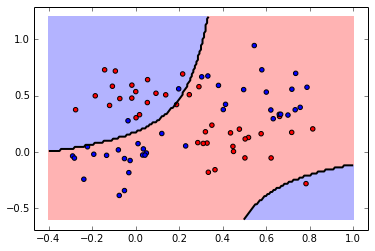

In [33]:
plt.scatter(p1[:,0], p1[:,1], c='red')
plt.scatter(p2[:,0], p2[:,1], c='blue')

# class 0 and 1 : areas
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                     np.linspace(y_min, y_max, ny))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
               norm=colors.Normalize(0., 1.))
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='k')

plt.scatter(p1[:,0], p1[:,1], c='red')
plt.scatter(p2[:,0], p2[:,1], c='blue')

plt.show()

<img src="Auswahl_2016-01-11_008.png">

<img src="Auswahl_2016-01-11_009.png">

<img src="Auswahl_2016-01-11_010.png">

<img src="Auswahl_2016-01-11_011.png">

<img src="Auswahl_2016-01-11_012.png">